## overview

In [1]:
# default package
import logging
import sys 
import os
import pathlib
import IPython
import random
import typing as t

In [2]:
# third party package
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from tqdm import tqdm
from matplotlib.animation import FuncAnimation
import scipy

In [3]:
# my package
sys.path.append(os.path.join(pathlib.Path().resolve(),"../"))

In [4]:
# reload settings
%load_ext autoreload
%autoreload 2

In [5]:
# logger
logger=logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)

## 変分近似

In [6]:
mu = np.array([0,0])
sigma = np.array([[1,0.5],[0.5,1]])
inv = np.linalg.inv(sigma)

In [7]:
def gaussian(x)->float:
    """
    二次元正規分布の確率密度を返す関数
    """
    det = np.linalg.det(sigma)
    n = x.ndim
    return np.exp(-np.diag((x - mu)@inv@(x - mu).T)/2.0) / (np.sqrt((2 * np.pi) ** n * det))

In [8]:
def create_grid(func,min:int=-3,max:int=3):
    x = y = np.arange(min, max, 0.5)
    X, Y = np.meshgrid(x, y)
    z = np.c_[X.ravel(),Y.ravel()]
    Z = func(z)
    Z = Z.reshape(X.shape)
    return X,Y,Z

In [9]:
def variational_inference(x)->float:
    m2=1
    for _ in range(100):
        m1=mu[0]-inv[0,1]/inv[0,0]*(m2-mu[1])
        m2=mu[1]-inv[1,0]/inv[1,1]*(m1-mu[0])
    q1=scipy.stats.norm.pdf(x[:,0],loc=m1,scale=1/inv[0,0])
    q2=scipy.stats.norm.pdf(x[:,1],loc=m2,scale=1/inv[1,1])
    return q1*q2

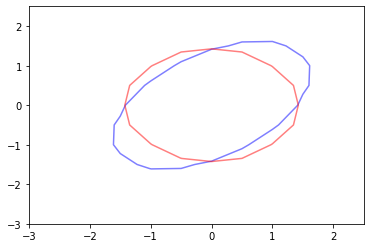

In [10]:
X,Y,Z=create_grid(gaussian)
plt.contour(X, Y, Z,alpha=0.5,levels=[0.05],colors="blue");
X,Y,Z=create_grid(variational_inference)
plt.contour(X, Y, Z,alpha=0.5,levels=[0.05],colors="red");